## Activate widget

In [1]:

from pyomo.opt import SolverFactory, TerminationCondition
from src.analyses.value_function import ValueFunction
from src.analyses.convergence_analysis import HausdorffAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact
from tqdm.notebook import tqdm
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from scipy.optimize import curve_fit
def get_critical_width(alg,y_optimal,k=1,abs_epsilon=0.01):
    haus=HausdorffAnalyzer(alg)
    print(f"width: {abs_epsilon/k}")
    print(haus._gen_interval(y_optimal,abs_epsilon/k))
def linear_func(x, a, b):
        return a * x + b
def convergence_analysis(alg,fixed_pt,optimal_sol,start=-5,stop=0,steps=6,name="instance"):

    haus=HausdorffAnalyzer(alg)
    eps_list, distances=haus.analyze(y=fixed_pt, v=optimal_sol,
                    eps_min= start, eps_max = stop, steps= steps,
                    y_optimal= True)
    log_eps = np.log10(eps_list)
    log_distances = np.log10(distances)

    # Perform curve fitting
    params, _ = curve_fit(linear_func, log_eps, log_distances)
    print(f"Slope:{params[0]} intercept:{params[1]}")
    plt.loglog(eps_list, distances)
    plt.grid()
    plt.xticks(np.logspace(start, stop, steps))
    plt.xlabel("epsilon")
    plt.ylabel("Hausdorff distance")
    plt.title(name)
    plt.show()
plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-4-4', 'fontsize']])

## FLECCS (LP)

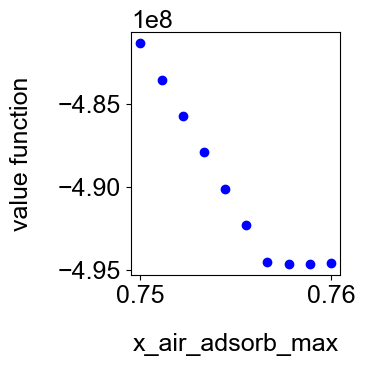

In [3]:
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
fleccs_obj = -4.946928843629e+08  # Replace with actual value
fleccs_sol = {'x_sorbent_total': 0.7571021770410511,
  'x_air_adsorb_max': 0.7567643358197031} 
fleccs_y_bound = {'x_sorbent_total': [0.0, 1.0],"x_air_adsorb_max": [0.0, 1.0]}

n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg=CaoZavalaAlgo(m,solver="gurobi")
# convergence_analysis(alg,fleccs_sol,fleccs_obj,
#                     start=-5,stop=0,steps=6,name="FLECCS")
v_f= ValueFunction(m,solver="gurobi")
v_f.calc_1D(idx="x_air_adsorb_max", y_val_fix=fleccs_sol,
                interval= [0.75,0.76], step = 10)
v_f.plot_1D()



## Poutil (LP)

In [ ]:
from NSPLIB.src.instances.poutil.poutil_SP import const_model

poutil_obj = 266187.5332404778  # Replace with actual value
poutil_sol = {'alpha': 74.94473247856709, 'beta': 9.000000000000028}  # Replace with actual solution values
poutil_y_bound = {'alpha': [0.0, 470], 'beta': [0.0, 470]}  # Replace with actual bounds
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
from pyomo.opt import SolverFactory
solver= SolverFactory("gurobi")
solver.solve(m.origin_model, tee=True)

Read LP format model from file /var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/tmpfeblf0hz.pyomo.lp
Reading time = 0.01 seconds
x1: 6534 rows, 3776 columns, 27849 nonzeros
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.6.0 24G5054d)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6534 rows, 3776 columns and 27849 nonzeros
Model fingerprint: 0x29ac8af5
Variable types: 1463 continuous, 2313 integer (2313 binary)
Coefficient statistics:
  Matrix range     [2e-01, 3e+04]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 5e+02]
  RHS range        [1e+00, 5e+02]
Presolve removed 540 rows and 430 columns
Presolve time: 0.06s
Presolved: 5994 rows, 3346 columns, 25703 nonzeros
Variable types: 378 continuous, 2968 integer (2692 binary)
Found heuristic solution: objective 309314.30352

Root relaxation: objective 2.465228e+05, 3918 iterations, 0.06 seconds (0.07 work units)

    Nodes    |

In [ ]:
from NSPLIB.src.instances.poutil.poutil_SP import const_model

poutil_obj = 266187.5332404778  # Replace with actual value
poutil_sol = {'alpha': 74.94473247856709, 'beta': 9.000000000000028}  # Replace with actual solution values
poutil_y_bound = {'alpha': [0.0, 470], 'beta': [0.0, 470]}  # Replace with actual bounds
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg=CaoZavalaAlgo(m,solver="gurobi")
convergence_analysis(alg,poutil_sol,poutil_obj,
                    start=-5,stop=0,steps=6,name="Poutil")
# v_f= ValueFunction(m,solver="gurobi")
# v_f.calc_1D(idx="beta", y_val_fix=poutil_sol,
#                 interval= [8.9,9.1], step = 70)
# v_f.plot_1D()

Calculating the Hausdorff distances...


TypeError: unsupported operand type(s) for +=: 'float' and 'UndefinedData'

: 

## Ex8_4_4 (NLP)

In [ ]:
from NSPLIB.src.instances.ex8_4_4.ex8_4_4_SP import const_model

ex844_obj= 0.33272388311799445

ex844_sol = {
    'x10': -0.23129676903369037, 'x11': 1.2249985914391361, 'x12': 0.05263738880099749, 'x13': 0.5614202118628403,
    'x14': 0.6217131656002401, 'x15': 1.1, 'x16': 0.806868640168786, 'x17': 0.663161467338442, 'x6': -1.1370129865018144,
    'x7': 1.5979758364259327, 'x8': -0.5986905053355759, 'x9': 1.372365581205024
}

ex844_y_bound = {
    'x10': [-1.2, 0.8], 'x11': [0.1, 2.1], 'x12': [-1.1, 0.9], 'x13': [0, 1],
    'x14': [0, 1], 'x15': [1.1, 1.3], 'x16': [0, 1], 'x17': [0, 1],
    'x6': [-2, 0], 'x7': [0.5, 2.5], 'x8': [-1.5, 0.5], 'x9': [0.2, 2.2]
}

sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()

alg=CaoZavalaAlgo(m,solver="baron")

#convergence_analysis(alg,ex844_sol,ex844_obj,start=-6,stop=-2,steps=5,name="Ex8_4_4")
get_critical_width(alg,ex844_sol,k=10**(-0.08925732473439485),abs_epsilon=abs(ex844_obj*0.003))

width: 0.0012259211998386877
{'x10': [-0.2319097296336097, -0.23068380843377104], 'x11': [1.2243856308392167, 1.2256115520390556], 'x12': [0.052024428201078145, 0.05325034940091684], 'x13': [0.560807251262921, 0.5620331724627596], 'x14': [0.6211002050003208, 0.6223261262001595], 'x15': [1.1, 1.1006129605999195], 'x16': [0.8062556795688667, 0.8074816007687053], 'x17': [0.6625485067385226, 0.6637744279383613], 'x6': [-1.1376259471017338, -1.136400025901895], 'x7': [1.5973628758260132, 1.598588797025852], 'x8': [-0.5993034659354952, -0.5980775447356566], 'x9': [1.3717526206051045, 1.3729785418049434]}


: 

## Process value function (NLP)

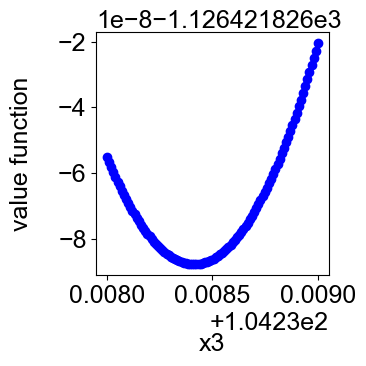

: 

In [ ]:
from NSPLIB.src.instances.process.process_SP import const_model
process_obj = -1126.4218270121305
process_sol = {"x1":1727.2601809997955,"x2":16000,"x3":104.23841082714829,"x5":2000}
process_y_bound = {"x1":[10,2000],"x2":[0,16000],"x3":[0,120],"x5":[0,2000]}

sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
# bound5={'x1': [np.float64(1727.2601759997954), np.float64(1727.2601859997956)], 'x2': [np.float64(15999.999995), 16000], 'x3': [np.float64(104.23840582714828), np.float64(104.23841582714829)], 'x5': [np.float64(1999.999995), 2000]}
# bound6={'x1': [np.float64(1727.2601804997955), np.float64(1727.2601814997954)], 'x2': [np.float64(15999.9999995), 16000], 'x3': [np.float64(104.23841032714829), np.float64(104.23841132714828)], 'x5': [np.float64(1999.9999995), 2000]}
# m.update_y_bound(bound6)
alg=CaoZavalaAlgo(m,solver="baron")
# solver=SolverFactory("baron")
# solver.solve(m.aux_models["lbd"][2])
#convergence_analysis(alg,process_sol,process_obj,start=-4,stop=0,steps=5,name="Process")
v_f= ValueFunction(m,solver="baron")
v_f.calc_1D(idx="x3", y_val_fix=process_sol,
                interval= [104.238,104.239], step = 100)

v_f.plot_1D()
# get_critical_width(alg,process_sol,k=10**(0.372133452425343),abs_epsilon=abs(process_obj*0.005))

In [ ]:
v_f.total_value_func

array([-1126.42182656, -1126.42182656, -1126.42182656, -1126.42182656,
       -1126.42182656, -1126.42182656, -1126.42182656, -1126.42182657,
       -1126.42182657, -1126.42182657, -1126.42182657, -1126.42182657,
       -1126.42182657, -1126.42182657, -1126.42182657, -1126.42182657,
       -1126.42182658, -1126.42182658, -1126.42182658, -1126.42182658,
       -1126.42182658, -1126.42182658, -1126.42182658, -1126.42182658,
       -1126.42182658, -1126.42182658, -1126.42182658, -1126.42182658,
       -1126.42182658, -1126.42182659, -1126.42182659, -1126.42182659,
       -1126.42182659, -1126.42182659, -1126.42182659, -1126.42182659,
       -1126.42182659, -1126.42182659, -1126.42182659, -1126.42182659,
       -1126.42182659, -1126.42182659, -1126.42182659, -1126.42182659,
       -1126.42182659, -1126.42182659, -1126.42182659, -1126.42182659,
       -1126.42182659, -1126.42182659, -1126.42182659, -1126.42182659,
       -1126.42182659, -1126.42182658, -1126.42182658, -1126.42182658,
      

: 

## Pooling value function (MINLP)


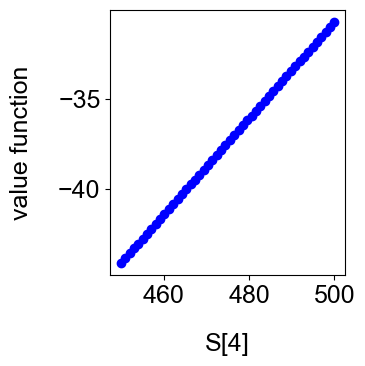

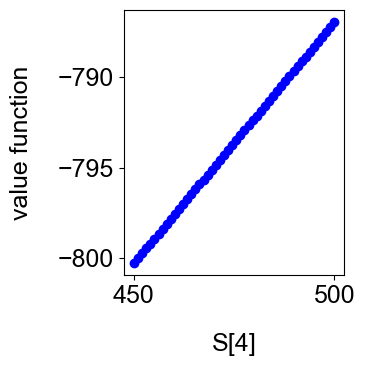

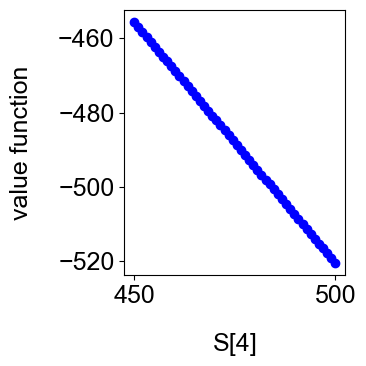

: 

In [ ]:
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
# Constants
pooling_obj=-1338.2471283376406
pooling_sol = {
    'A[1]': 300.0, 'A[2]': 201.92127476313524, 'A[3]': 0.0, 'A[4]': 0.0, 'A[5]': 245.18105081826008,
    'S[1]': 247.10232558139526, 'S[2]': 0.0, 'S[3]': 0.0, 'S[4]': 500.0
}

pooling_y_bound = {
    'A[1]': [0, 300], 'A[2]': [0, 250], 'A[3]': [0, 0], 'A[4]': [0, 0], 'A[5]': [0, 300],
    'S[1]': [0, 400], 'S[2]': [0, 0], 'S[3]': [0, 0], 'S[4]': [0, 500]
}
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['lambd[1]'] = 1
binary_y_val['lambd[2]'] = 1
binary_y_val['lambd[5]'] = 1
binary_y_val['theta[1]'] = 1
binary_y_val['theta[4]'] = 1
m.fix_binary_y(binary_y_val)

alg=CaoZavalaAlgo(m,solver="baron")
#convergence_analysis(alg,pooling_sol,pooling_obj,start=-5,stop=0,steps=6,name="Pooling")
v_f= ValueFunction(m,solver="baron")
# v_f.calc_2D(idx_1="A[5]", idx_2="S[1]",y_val_fix=pooling_sol,
#                 interval_1= [245,246],interval_2=[245,250], step = 30)
# v_f.plot_2D()
v_f.calc_1D(idx="S[4]", y_val_fix=pooling_sol,
                interval= [450,500], step = 50)
v_f.plot_1D(s=1)
v_f.plot_1D(s=2)
v_f.plot_1D(s=3)

# get_critical_width(alg,pooling_sol,k=10**(0.20536373031357635),abs_epsilon=abs(pooling_obj*0.003))

In [ ]:
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
# Constants
pooling_obj=-1338.2471283376406
pooling_sol = {
    'A[1]': 300.0, 'A[2]': 201.92127476313524, 'A[3]': 0.0, 'A[4]': 0.0, 'A[5]': 245.18105081826008,
    'S[1]': 247.10232558139526, 'S[2]': 0.0, 'S[3]': 0.0, 'S[4]': 500.0
}

pooling_y_bound = {
    'A[1]': [0, 300], 'A[2]': [0, 250], 'A[3]': [0, 0], 'A[4]': [0, 0], 'A[5]': [0, 300],
    'S[1]': [0, 400], 'S[2]': [0, 0], 'S[3]': [0, 0], 'S[4]': [0, 500]
}

for i in range(0,10,1):
    sto_m = const_model()
    m = CaoZavalaModel.from_sto_m(sto_m)
    m.build()
    binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']
    binary_y_val = {y: 0 for y in binary_ys}
    binary_y_val['lambd[1]'] = 1
    binary_y_val['lambd[2]'] = 1
    binary_y_val['lambd[5]'] = 1
    binary_y_val['theta[1]'] = 1
    binary_y_val['theta[4]'] = 1
    m.fix_binary_y(binary_y_val)
    pooling_sol = {
        'A[1]': 300.0-i, 'A[2]': 201.92127476313524, 'A[3]': 0.0, 'A[4]': 0.0, 'A[5]': 245.18105081826008,
        'S[1]': 247.10232558139526-i, 'S[2]': 0.0, 'S[3]': 0.0, 'S[4]': 500.0
        }
    m.fix_y_origin(pooling_sol)
    from pyomo.opt import SolverFactory
    solver = SolverFactory("baron")
    results=solver.solve(m.origin_model)
    print(results["Problem"][0]["Upper bound"])

-1338.24712833764
-1338.0330514145624
-1337.8189744914866
-1337.6048975684091
-1337.3908206453318
-1337.1767437222554
-1336.962666799179
-1336.7485898761015
-1336.5345129530251
-1336.3204360299476


: 

## Crude Selection value function (MINLP)

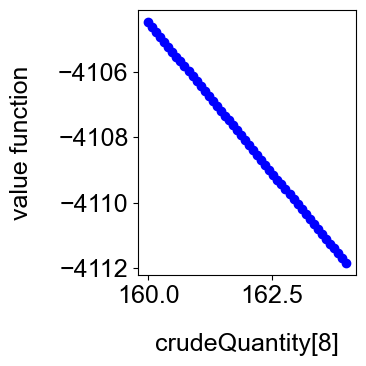

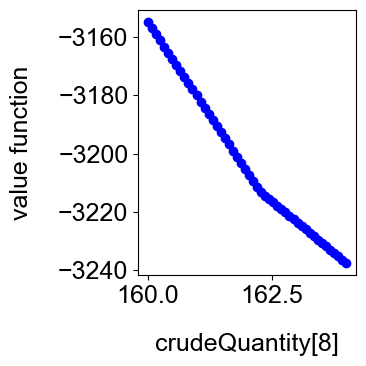

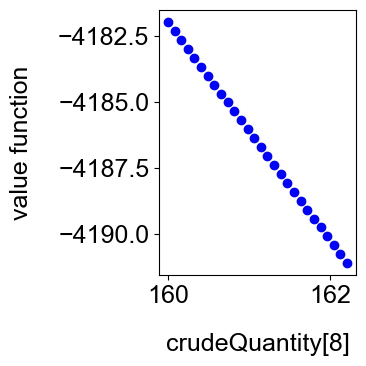

: 

In [ ]:
from NSPLIB.src.instances.crude_selection.crude_selection import const_model

crude_obj = -18350.146929611754
crude_sol = {f'crudeQuantity[{i}]': 0. for i in range(1, 10 + 1)}
crude_sol['crudeQuantity[2]'] = 150.87595641747944
crude_sol['crudeQuantity[3]'] = 201.29570746971186
crude_sol['crudeQuantity[4]'] = 56.18456149457359
crude_sol['crudeQuantity[8]'] = 162.2466500589715
crude_sol['crudeQuantity[10]'] = 18.848116800048512
crude_y_bound = {
    'crudeQuantity[1]': [0, 201.29570747217807],
    'crudeQuantity[2]': [0, 212.48012718600953],
    'crudeQuantity[3]': [0, 201.29570747217807],
    'crudeQuantity[4]': [0, 199.57869634340224],
    'crudeQuantity[5]': [0, 210.54848966613673],
    'crudeQuantity[6]': [0, 222.1383147853736],
    'crudeQuantity[7]': [0, 196.7885532591415],
    'crudeQuantity[8]': [0, 208.54531001589828],
    'crudeQuantity[9]': [0, 204.3720190779014],
    'crudeQuantity[10]': [0, 210.2623211446741]
}

sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['pickCrude[2]'] = 1
binary_y_val['pickCrude[3]'] = 1
binary_y_val['pickCrude[4]'] = 1
binary_y_val['pickCrude[8]'] = 1
binary_y_val['pickCrude[10]'] = 1
m.fix_binary_y(binary_y_val)
updated_y_bound=m.y_bound
updated_y_bound['crudeQuantity[1]']=(0,0)
updated_y_bound['crudeQuantity[5]']=(0,0)
updated_y_bound['crudeQuantity[6]']=(0,0)
updated_y_bound['crudeQuantity[7]']=(0,0)
updated_y_bound['crudeQuantity[9]']=(0,0)
m.update_y_bound(updated_y_bound)
alg=CaoZavalaAlgo(m,solver="baron")
#convergence_analysis(alg,crude_sol,crude_obj,start=-5,stop=-1,steps=6,name="Crude")
v_f=ValueFunction(m,solver="baron")
# v_f.calc_2D(idx_1="crudeQuantity[2]", idx_2="crudeQuantity[4]",y_val_fix=crude_sol,
#                 interval_1= [150,152],interval_2=[55,57], step = 30)
# v_f.plot_2D()
v_f.calc_1D(idx="crudeQuantity[8]", y_val_fix=crude_sol,interval= [160,164], step = 50)
v_f.plot_1D(s=1)
v_f.plot_1D(s=2)
v_f.plot_1D(s=3)
# get_critical_width(alg,crude_sol,k=10**(2.0426806318907245),abs_epsilon=abs(crude_obj*0.0015))

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a * x + b

def filter_and_fit(x, y):
    # Filter out infinity values
    mask = np.isfinite(x) & np.isfinite(y)
    x_filtered = x[mask]
    y_filtered = y[mask]
    
    # Perform linear regression
    params, _ = curve_fit(linear_func, x_filtered, y_filtered)
    slope = params[0]
    return slope
filter_and_fit(v_f.y_discrete, v_f.total_value_func)

np.float64(-97.28870987007144)

: 

In [ ]:
from NSPLIB.src.instances.crude_selection.crude_selection import const_model
crude_obj = -18350.146929611754
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
crude_sol = {f'crudeQuantity[{i}]': 0. for i in range(1, 10 + 1)}
crude_sol['crudeQuantity[2]'] = 150.87595641747944
crude_sol['crudeQuantity[3]'] = 201.29570746971186
crude_sol['crudeQuantity[4]'] = 56.18456149457359
crude_sol['crudeQuantity[8]'] = 162.2466500589715
crude_sol['crudeQuantity[10]'] = 18.848116800048512
binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['pickCrude[2]'] = 1
binary_y_val['pickCrude[3]'] = 1
binary_y_val['pickCrude[4]'] = 1
binary_y_val['pickCrude[8]'] = 1
binary_y_val['pickCrude[10]'] = 1
m.fix_binary_y(binary_y_val)
updated_y_bound=m.y_bound
updated_y_bound['crudeQuantity[1]']=(0,0)
updated_y_bound['crudeQuantity[5]']=(0,0)
updated_y_bound['crudeQuantity[6]']=(0,0)
updated_y_bound['crudeQuantity[7]']=(0,0)
updated_y_bound['crudeQuantity[9]']=(0,0)
m.update_y_bound(updated_y_bound)
alg=CaoZavalaAlgo(m,solver="baron")
haus=HausdorffAnalyzer(alg)
epsilon=abs(0.03*crude_obj)
new_bound=haus._gen_interval(y=crude_sol, eps=2*epsilon/97.28870987007144*2)  #reuse _gen_interval multiply by 2 to fit our need

m.update_y_bound(new_bound)
alg=CaoZavalaAlgo(m,solver="baron")
alg.solve(max_iter=1e8, max_time=3600*24, tol=0.03,ubd_midpt_fix=0,ubd_local_solve=1,ubd_provided=-18350.146929613762) #JY:relative tolerance

Solving the problem via SBB...
	Maximum iteration: 100000000.0
	Maximum time: 86400
	Tolerance: 3E-02
Initialize the model...
	Root node lower bound: -19202.39, upper bound: -18350.15
	Total initialization CPU time: 0.44 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1         1.30         2.79   -19194.9359   -18350.1469   4.6037%
         2         2.01         4.53   -19194.9359   -18350.1469   4.6037%
         3         2.72         6.23   -19177.8537   -18350.1469   4.5106%
         4         3.47         8.01   -19177.8537   -18350.1469   4.5106%
         5         4.24         9.74   -19177.8537   -18350.1469   4.5106%
         6         5.03        11.53   -19155.9141   -18350.1469   4.3911%
         7         5.78        13.26   -19149.6379   -18350.1469   4.3569%
         8         6.52        14.98   -19149.6379   -18350.1469   4.3569%
         9         7.26        16.75   -19149.5578   -18350.1469   4.3564%
   

: 

## Tanksize value function (MINLP)

In [ ]:
from NSPLIB.src.instances.tanksize.tanksize import const_model

tanksize_obj = 0.9030394623070541
tanksize_sol = {"productTankSize[1]": 659.2053849850757, "productTankSize[2]": 552.3954188143167, "productTankSize[3]": 225.73997707963284}
tankszie_y_bound = {"productTankSize[1]": [643, 4018.36], "productTankSize[2]": [536, 3348], "productTankSize[3]": [214, 1339.45]}
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg=CaoZavalaAlgo(m,solver="baron")

#convergence_analysis(alg,tanksize_sol,tanksize_obj,start=-5,stop=0,steps=6,name="Tanksize")
get_critical_width(alg,tanksize_sol,k=10**(-3.6249409217234163),abs_epsilon=abs(tanksize_obj*0.001))
# v_f= ValueFunction(m,solver="baron")
# v_f.calc_1D(idx="productTankSize[1]", y_val_fix=tanksize_sol,
#                 interval= [659,660], step = 50)
# v_f.plot_1D(s=0)

{'productTankSize[1]': [657.3016010611063, 661.1091689090451], 'productTankSize[2]': [550.4916348903473, 554.2992027382861], 'productTankSize[3]': [223.83619315566344, 227.64376100360224]}


: 